# Microproyecto 2
# Parametrización de trazadores cúbicos para el trazo de letras
## Métodos Numéricos 1
### Andrea Argüello, Lorena Beltrán y Estuardo Menéndez

Hoy en día, es importante el reconocer texto obtenido desde una imagen. Esto es especialmente útil a la hora de realizar tipografías. Entonces, es óptimo el obtener puntos claves de la imágen, y por medio de trazadores cúbicos, valga la redundancia, trazar la misma.

La dificultad del proceso radica en el preprocesamiento de imágenes, ya que se debe limpiar la misma para luego poder extraer los puntos clave (no tiene sentido el extraer cada uno de los pixeles, además esto sería costoso en procesamiento).

Para realizar la curva, se utilizan trazadores cúbicos para representar la trayectoria $s$ como una parametrización de las coordenadas de los puntos, obteniendo así $(s_x, s_y)$. A partir de este, se obtienen las coordenadas, evaluando en $s_x$ y $s_y$ los valores acumulativos de la longitud de la curva (es decir, la posición de los puntos en términos de la longitud de la trayectoria).

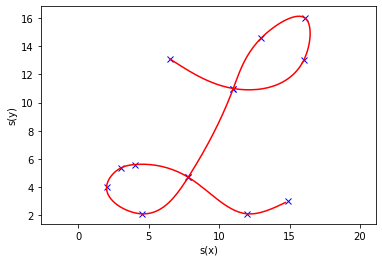

In [1]:
from trazador2d import interpolar_trazador_2d
import numpy as np
import matplotlib.pyplot as plt
# Una L que encontramos en Chegg
l_y=[13.1,11,13,16,14.6,11,4.7,2.1,4.0,5.35,5.6,4.7,2.10,3.00]   
l_x=[6.50,11,16,16.1,13.0,11,7.8,4.5,2.0,3.0,4.0,7.8,12.0,14.9]
s_x, s_y = interpolar_trazador_2d(l_x, l_y, 250) #250 se acerca bastante al último punto
plt.plot(l_x, l_y, "xb")
plt.plot(s_x, s_y, "r")
plt.axis("equal")
plt.xlabel("s(x)")
plt.ylabel("s(y)")
plt.show()

El algoritmo utilizado para los trazadores cúbicos, el cual se puede encontrar en ```trazador.py```, encuentra la solución resolviendo una la matriz tridiagonal (referirse a Revez, 2014). Esto debido a que la matriz a resolver es de menor dimensión que la vista en clase. Nótese la diferencia en el siguiente ejemplo:

In [8]:
from trazador import calc_tridiagonal
temp=[24,32,40]
o=[8.418,7.305,6.413]
calc_tridiagonal(len(temp),np.diff(temp))

array([[ 1.,  0.,  0.],
       [ 8., 32.,  8.],
       [ 0.,  0.,  1.]])

Compárese esta con la matriz realizada para el laboratorio 4, para resolver el mismo problema por medio de trazadores cúbicos:

In [6]:
np.matrix([[24**3,24**2,24,1,0,0,0,0],#s1
           [32**3,32**2,32,1,0,0,0,0],#s1
           [0,0,0,0,32**3,32**2,32,1],#s2
           [0,0,0,0,40**3,40**2,40,1],#s2
           [3*32**2,2*32,1,0,-3*32**2,-2*32,-1,0],#s1'=s2' (32,7.305)
           [6*32,2*32,0,0,-6*32,-2*32,0,0],#s1''=s2'' (32,7.305)
           [6*24,2*24,0,0,0,0,0,0],#s1''=0
           [0,0,0,0,6*40,2*40,0,0],#s2''=0
          ])

matrix([[13824,   576,    24,     1,     0,     0,     0,     0],
        [32768,  1024,    32,     1,     0,     0,     0,     0],
        [    0,     0,     0,     0, 32768,  1024,    32,     1],
        [    0,     0,     0,     0, 64000,  1600,    40,     1],
        [ 3072,    64,     1,     0, -3072,   -64,    -1,     0],
        [  192,    64,     0,     0,  -192,   -64,     0,     0],
        [  144,    48,     0,     0,     0,     0,     0,     0],
        [    0,     0,     0,     0,   240,    80,     0,     0]])

Debido a la cantidad de puntos requeridas para este problema, y el hecho de que se están calculando trazadores para ambas dimensiones, es más óptimo utilizar el método de resolución por medio de matrices tridiagonales.